In [2]:
import pyflubl
import IPAC_2025
import matplotlib.pyplot as _plt

m = IPAC_2025.test_IPAC_2025()

MakeFlukaCustomFluka


Read 1 detectors
Statistics present


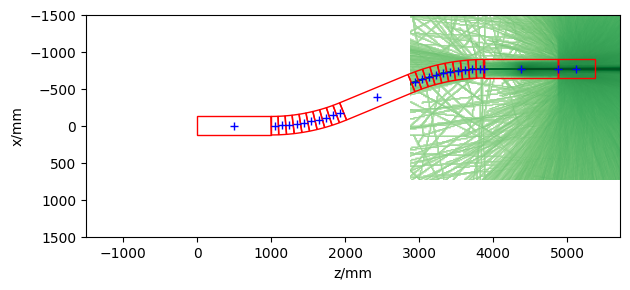

In [13]:
d = pyflubl.Analysis.openFile("./run_IPAC_2025/temp.bnn","usrbin")
bk = pyflubl.Analysis.openBookkeepingFile("IPAC_2025.json")
pyflubl.Analysis.plot_usrbin(d,detector_idx=0,projection=1,bookkeeping=bk)
pyflubl.Analysis.plot_machine_xz(m)
# _plt.colorbar()
_plt.savefig("IPAC_USRBIN.pdf")

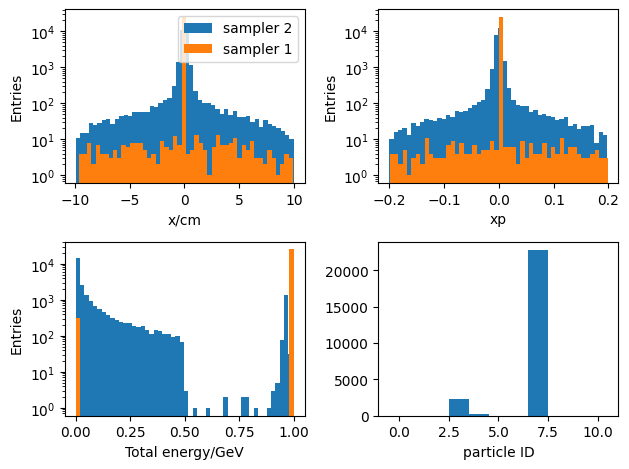

In [34]:
import numpy
import uproot
import awkward as ak


file_names = ["./run_IPAC_2025/IPAC_2025001_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025002_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025003_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025004_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025005_pyflubl.root"]

trees = [uproot.open(f)["event"] for f in file_names]

arrays = [tree["s1.x"].array() for tree in trees]
s1_x_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s2.x"].array() for tree in trees]
s2_x_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s1.xp"].array() for tree in trees]
s1_xp_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s2.xp"].array() for tree in trees]
s2_xp_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s1.energy"].array() for tree in trees]
s1_energy_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s2.energy"].array() for tree in trees]
s2_energy_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s2.partID"].array() for tree in trees]
s2_partID_all = numpy.ravel(ak.concatenate(arrays))


_plt.subplot(2,2,1)
_plt.hist(s2_x_all[abs(s2_x_all) < 10],50, label="sampler 2");
_plt.hist(s1_x_all[abs(s1_x_all) < 10],50, label="sampler 1");
_plt.xlabel("x/cm")
_plt.ylabel("Entries")
_plt.semilogy();
_plt.legend()

_plt.subplot(2,2,2)
_plt.hist(s2_xp_all[abs(s2_xp_all) < 0.2],50, label="sampler 2");
_plt.hist(s1_xp_all[abs(s1_xp_all) < 0.2],50, label="sampler 1");
_plt.xlabel("xp")
_plt.ylabel("Entries")
_plt.semilogy();

_plt.subplot(2,2,3)
_plt.hist(s2_energy_all, 50, label="sampler 2");
_plt.hist(s1_energy_all, 50, label="sampler 1");
_plt.xlabel("Total energy/GeV")
_plt.ylabel("Entries")
_plt.semilogy();

_plt.subplot(2,2,4)
_plt.hist(s2_partID_all, 11, (-0.5,10.5), label="sampler 2");
_plt.xlabel("particle ID")


_plt.tight_layout()

_plt.savefig("IPAC_SAMPLER.pdf")